In [1]:
import pandas as pd

import calendar
import datetime

## Import data

In [2]:
data = pd.read_csv('TANKTemp060_098.csv',sep=",", header=None, names=["date", "value"])
data

,date,value
0,2015-060-00:00:30.114,18.744939
1,2015-060-00:00:30.882,18.744900
2,2015-060-00:02:38.114,18.785425
3,2015-060-00:02:38.882,18.785400
4,2015-060-00:04:46.114,18.785425
...,...,...
32117,2015-098-02:25:34.114,18.502024
32118,2015-098-02:27:42.114,18.502024
32119,2015-098-02:29:50.110,18.542510
32120,2015-098-02:31:58.114,18.542510


## Prepare data

In [3]:
data.dropna(inplace=True)
# data.reindex(data)



data.reset_index(drop=True, inplace = True)
data.head(1572)

,date,value
0,2015-060-00:00:30.114,18.744939
1,2015-060-00:00:30.882,18.744900
2,2015-060-00:02:38.114,18.785425
3,2015-060-00:02:38.882,18.785400
4,2015-060-00:04:46.114,18.785425
...,...,...
1567,2015-061-13:50:22.110,20.698925
1568,2015-061-13:50:22.877,20.698900
1569,2015-061-13:52:30.114,20.698925
1570,2015-061-13:54:38.114,20.698925


In [4]:
data['StandardTime']=0
data.head(1572)

,date,value,StandardTime
0,2015-060-00:00:30.114,18.744939,0
1,2015-060-00:00:30.882,18.744900,0
2,2015-060-00:02:38.114,18.785425,0
3,2015-060-00:02:38.882,18.785400,0
4,2015-060-00:04:46.114,18.785425,0
...,...,...,...
1567,2015-061-13:50:22.110,20.698925,0
1568,2015-061-13:50:22.877,20.698900,0
1569,2015-061-13:52:30.114,20.698925,0
1570,2015-061-13:54:38.114,20.698925,0


In [5]:
data

,date,value,StandardTime
0,2015-060-00:00:30.114,18.744939,0
1,2015-060-00:00:30.882,18.744900,0
2,2015-060-00:02:38.114,18.785425,0
3,2015-060-00:02:38.882,18.785400,0
4,2015-060-00:04:46.114,18.785425,0
...,...,...,...
32114,2015-098-02:25:34.114,18.502024,0
32115,2015-098-02:27:42.114,18.502024,0
32116,2015-098-02:29:50.110,18.542510,0
32117,2015-098-02:31:58.114,18.542510,0


In [6]:
for i in range(len(data)):
    dd=data['date'][i].split('-')
    yy=int(dd[0])
    jd=int(dd[1])
    sec=dd[2].split(':')
    ss=sec[2][:-4]
    mm=sec[2][-3:]
    month = 1
    day = 0
    while jd - calendar.monthrange(yy,month)[1] > 0 and month <= 12:
        jd = jd - calendar.monthrange(yy,month)[1]
        month = month + 1

    data['StandardTime'][i]=datetime.datetime(yy, month, jd, int(sec[0]),int(sec[1]),int(ss),int(mm)*1000)

data.head()

D:\Anaconda3\envs\arima\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,value,StandardTime
0,2015-060-00:00:30.114,18.744939,2015-03-01 00:00:30.114000
1,2015-060-00:00:30.882,18.744900,2015-03-01 00:00:30.882000
2,2015-060-00:02:38.114,18.785425,2015-03-01 00:02:38.114000
3,2015-060-00:02:38.882,18.785400,2015-03-01 00:02:38.882000
4,2015-060-00:04:46.114,18.785425,2015-03-01 00:04:46.114000


In [7]:
data['epoch']=0
data.head()

,date,value,StandardTime,epoch
0,2015-060-00:00:30.114,18.744939,2015-03-01 00:00:30.114000,0
1,2015-060-00:00:30.882,18.744900,2015-03-01 00:00:30.882000,0
2,2015-060-00:02:38.114,18.785425,2015-03-01 00:02:38.114000,0
3,2015-060-00:02:38.882,18.785400,2015-03-01 00:02:38.882000,0
4,2015-060-00:04:46.114,18.785425,2015-03-01 00:04:46.114000,0


In [8]:
from datetime import datetime
import time

for i_m in range(len(data)):
    # convert utc -> epoch(sec)
    dd = time.mktime(data['StandardTime'][i_m].timetuple())
    ms = int(int(str(data['StandardTime'][i_m]).split('.')[1])/1000)
    # build epoch (millisec) by add microsec from utc to epoch(sec)
    ep_mil = int(str(int(dd))+str(ms))
    # add epoch (milsec) -> epoch column
    data['epoch'][i_m] = ep_mil

D:\Anaconda3\envs\arima\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [9]:
data.head()

,date,value,StandardTime,epoch
0,2015-060-00:00:30.114,18.744939,2015-03-01 00:00:30.114000,1425142830114
1,2015-060-00:00:30.882,18.744900,2015-03-01 00:00:30.882000,1425142830882
2,2015-060-00:02:38.114,18.785425,2015-03-01 00:02:38.114000,1425142958114
3,2015-060-00:02:38.882,18.785400,2015-03-01 00:02:38.882000,1425142958882
4,2015-060-00:04:46.114,18.785425,2015-03-01 00:04:46.114000,1425143086114


Text(0.5, 0, 'Time')

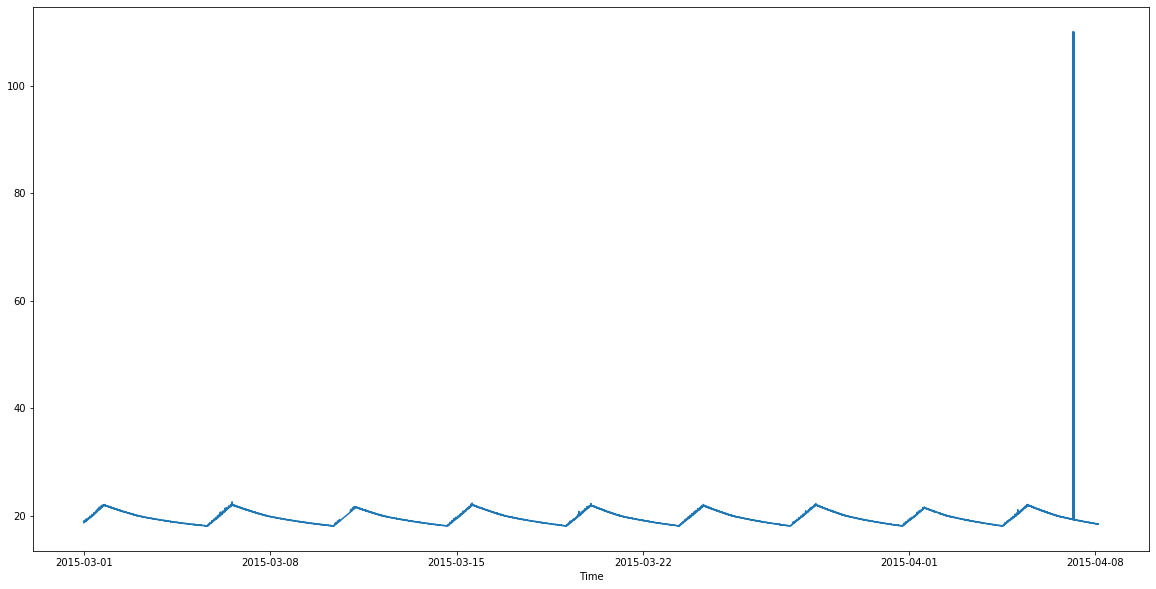

In [10]:
data['StandardTime'] = pd.to_datetime(data['StandardTime'])

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,10))
plt.plot(data['StandardTime'], data['value'])
plt.xlabel('Time')

In [11]:
data_sample = data.copy()

In [12]:
# remove outiler



In [13]:
qt1 = data_sample['value'].quantile([.25])
qt1=float(qt1.to_numpy())
qt3 = data_sample['value'].quantile([.75])
qt3 = float(qt3.to_numpy())

# calculate max value of boxplot
max_box = qt3+(1.5*(qt3-qt1))
max_box

23.460668

In [14]:
data_out = data_sample.copy()

In [15]:
# remove outlier
data_out.drop(data_out[data_out['value']>max_box].index, inplace=True)
data_out.reset_index(drop=True, inplace = True)

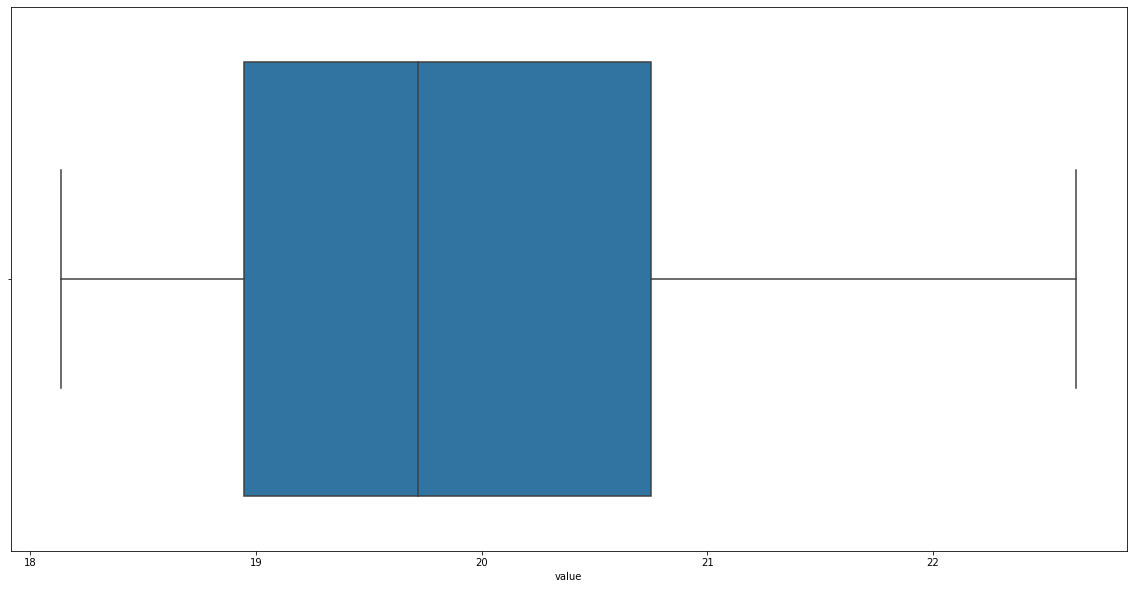

In [16]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.boxplot(data_out['value'])

Text(0.5, 0, 'Time')

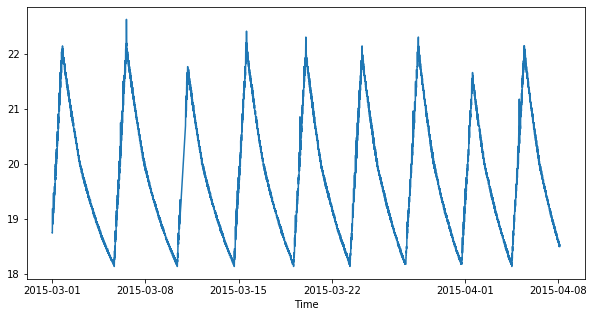

In [17]:
plt.figure(figsize=(10,5))
plt.plot(data_out['StandardTime'], data_out['value'])
plt.xlabel('Time')

In [18]:
data_out

,date,value,StandardTime,epoch
0,2015-060-00:00:30.114,18.744939,2015-03-01 00:00:30.114,1425142830114
1,2015-060-00:00:30.882,18.744900,2015-03-01 00:00:30.882,1425142830882
2,2015-060-00:02:38.114,18.785425,2015-03-01 00:02:38.114,1425142958114
3,2015-060-00:02:38.882,18.785400,2015-03-01 00:02:38.882,1425142958882
4,2015-060-00:04:46.114,18.785425,2015-03-01 00:04:46.114,1425143086114
...,...,...,...,...
32112,2015-098-02:25:34.114,18.502024,2015-04-08 02:25:34.114,1428434734114
32113,2015-098-02:27:42.114,18.502024,2015-04-08 02:27:42.114,1428434862114
32114,2015-098-02:29:50.110,18.542510,2015-04-08 02:29:50.110,1428434990110
32115,2015-098-02:31:58.114,18.542510,2015-04-08 02:31:58.114,1428435118114


### The order of differencing (d) in ARIMA model 

In [41]:
df = data_out.copy()

In [29]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.437786
p-value: 0.131354


In [33]:
result = adfuller(df.value.diff().diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -50.112829
p-value: 0.000000


ADF Statistic: -2.437786
p-value: 0.131354


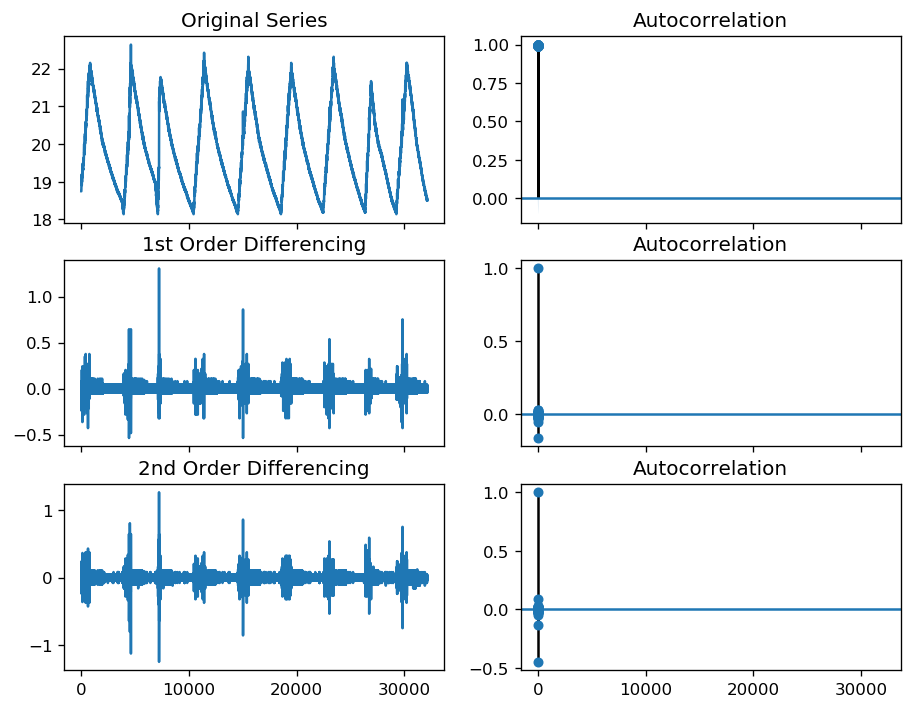

In [35]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
# df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

result = adfuller(df.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])


# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])



plt.show()

In [36]:
from pmdarima.arima.utils import ndiffs
# df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)
y = df.value

## Adf Test
ndiffs(y, test='adf')  # 2

# KPSS test
ndiffs(y, test='kpss')  # 0

# PP test:
ndiffs(y, test='pp')  # 2

1

###  the order of the AR term (p)

In [43]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# Import data
# df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/austa.csv')

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.value.diff().dropna(), ax=axes[1])

plt.show()



SyntaxError: invalid syntax (<ipython-input-43-068a5b42da21>, line 16)

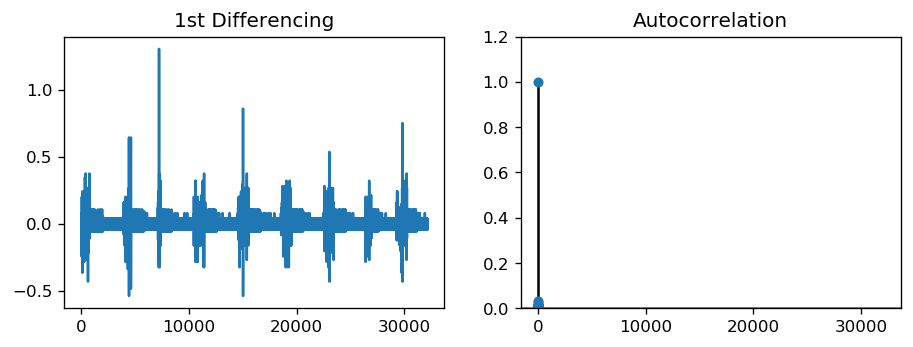

In [42]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# Import data
# df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/austa.csv')

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.value.diff().dropna(), ax=axes[1])

plt.show()

### build the ARIMA model 

In [44]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.value, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                32116
Model:                 ARIMA(1, 1, 2)   Log Likelihood               65304.626
Method:                       css-mle   S.D. of innovations              0.032
Date:                Tue, 24 Mar 2020   AIC                        -130599.251
Time:                        13:14:24   BIC                        -130557.366
Sample:                             1   HQIC                       -130585.855
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7.576e-06      0.000     -0.056      0.956      -0.000       0.000
ar.L1.D.value    -0.0188      0.033     -0.566      0.571      -0.084       0.046
ma.L1.D.value    -0.0453      0.033     

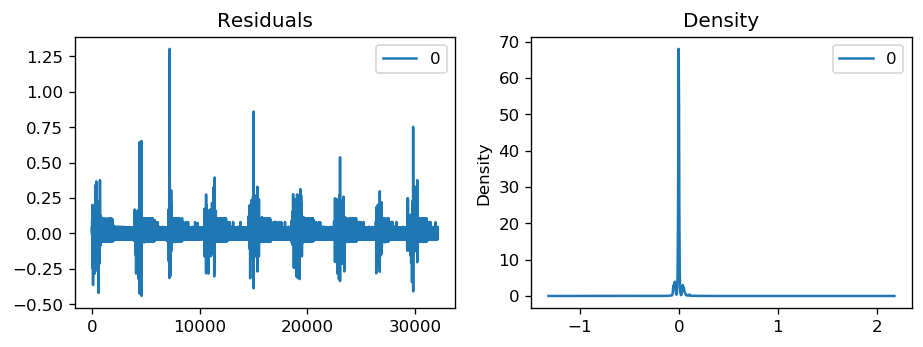

In [45]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

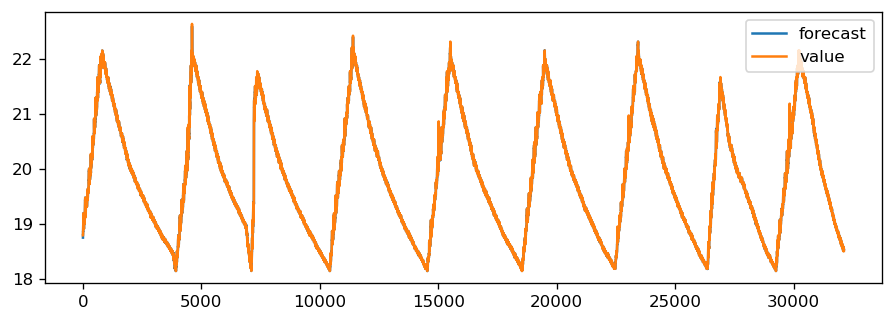

In [46]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

### find the optimal ARIMA model manually using Out-of-Time Cross validation

In [47]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.value[:27000]
test = df.value[27000:]

In [49]:
test

27000    21.236559
27001    21.236559
27002    21.236559
27003    21.236559
27004    21.236559
           ...    
32112    18.502024
32113    18.502024
32114    18.542510
32115    18.542510
32116    18.502024
Name: value, Length: 5117, dtype: float64

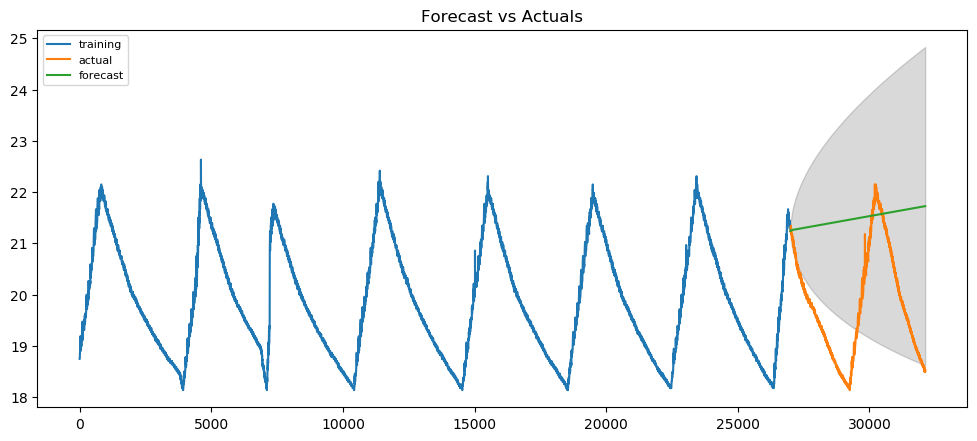

In [63]:
# Build Model
model = ARIMA(train, order=(3,1,1))  
# model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-3)  

# Forecast
fc, se, conf = fitted.forecast(5117, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [51]:
# Build Model
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(5117, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)0872
0
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.